# Conservation Analysis and Epitope Prediction


#### Author: C. Mazzaferro, K. Fisch
#### Email: cmazzafe@ucsd.edu
#### Date: August 2016
 
## Outline of Notebook
<a id = "toc"></a>
1. <a href = "#background">Background</a>
2. <a href = "#Real">Realignment</a>
3. <a href = "#Cons">Conservation Analysis</a>
4. <a href = "#affin">Affinty Binding Scoring</a>
5. <a href = "#summ">Summarizing Data</a>

<a id = "background"></a>
# Background

CRISPR (clustered regularly interspaced short palindromic repeat) is an adaptive immune system that provides protection against mobile genetic elements (viruses, transposable elements and conjugative plasmids).
CRISPR clusters contain spacers, sequences complementary to antecedent mobile elements, and target invading nucleic acids. CRISPR clusters are transcribed and processed into CRISPR RNA (crRNA). In type II CRISPR systems correct processing of pre-crRNA requires a trans-encoded small RNA (tracrRNA), endogenous ribonuclease 3 (rnc) and this protein. The tracrRNA serves as a guide for ribonuclease 3-aided processing of pre-crRNA; Cas9 only stabilizes the pre-crRNA:tracrRNA interaction and has no catalytic function in RNA processing. Subsequently Cas9/crRNA/tracrRNA endonucleolytically cleaves linear or circular dsDNA target complementary to the spacer; Cas9 is inactive in the absence of the 2 guide RNAs (gRNA). The target strand not complementary to crRNA is first cut endonucleolytically, then trimmed 3'-5' exonucleolytically. DNA-binding requires protein and both gRNAs, as does nuclease activity. Cas9 recognizes the protospacer adjacent motif (PAM) in the CRISPR repeat sequences to help distinguish self versus nonself, as targets within the bacterial CRISPR locus do not have PAMs. DNA strand separation and heteroduplex formation starts at PAM sites; PAM recognition is required for catalytic activity (PubMed:24476820). Confers immunity against a plasmid with homology to the appropriate CRISPR spacer sequences (CRISPR interference) (PubMed:21455174)

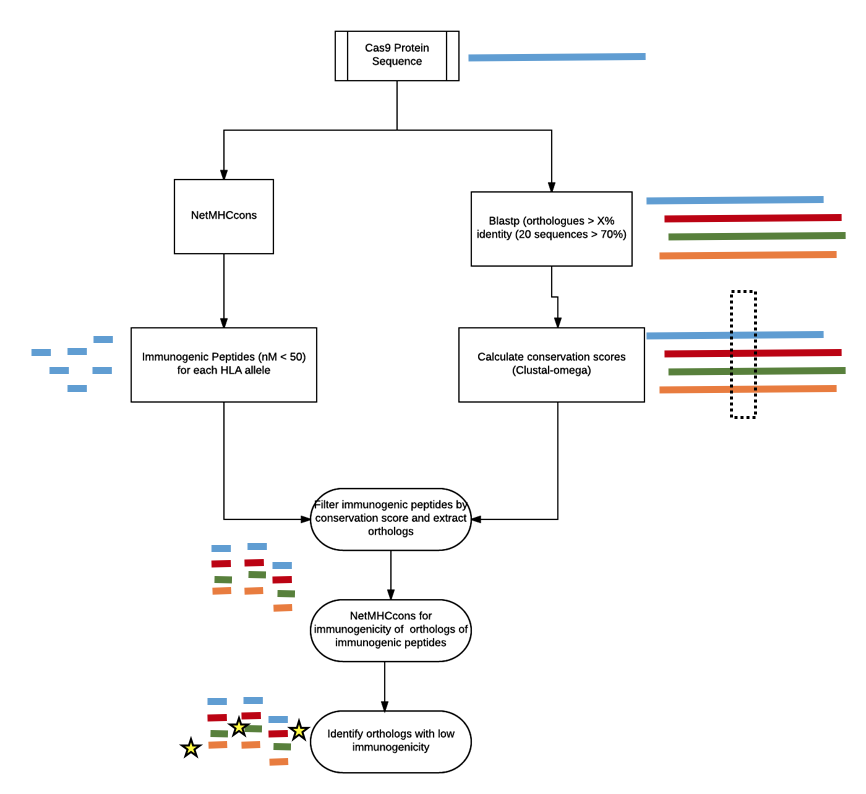

In [30]:
from IPython.display import Image
Image("/Users/carlomazzaferro/Documents/Bioinformatics_Internship/BINF Int Rand Pics/workflow_epitope.png")

The pipeline presented here is aimed at identify the most immunogenic peptides in Cas9. By looking at multiple sequence alignment scores for the possible peptides and their associated predicted MHC affinity, we can determine which peptides within a Cas9 orthologue can be swapped in order to reduce overall immunogenecity.

This 'Base Worflow' implements the following steps: 

1. Select proteins [from reference papaer](http://nar.oxfordjournals.org/content/suppl/2013/10/29/gkt1074.DC1/nar-02672-z-2013-File008.pdf)
2. Peform Multiple Sequence Alignement (MSA) using locally installed [Clustal Omega](http://www.clustal.org/omega/) in order to determine conservation scores
3. Calculate conservation scores for each n-mer (sizes 9, 10, 11) of the MSA
4. Predict the MHC affinity of each peptide using [CBS's prediction services](http://www.cbs.dtu.dk/services/), in particular [netMHCcons Server](http://www.cbs.dtu.dk/services/NetMHCcons/)
5. Output list of highly low-conservation, high affinity peptides for in-vitro research


From these results, three different workflowsm for peptide identification were constructed.

<a id = "Real"></a>
# Realigning Sequence

msa_utils.Alignment will automatically create a MSA fasta file and an html MSA file for easy viewing. 

In [1]:
import importlib
from mhc_parser import msa_utils

ref_prot_id = 'StreptococcusPyogenes_reference'
PROJECT_LOC = '/Users/carlomazzaferro/Documents/Bioinformatics_Internship/immune_stealth/Orignal_Prots_New_Workflow/'

msa_file = PROJECT_LOC + 'fasta_from_study_dealigned.fasta'

MSA_STUFF = msa_utils.Alignment(msa_file, ref_prot_id)

/Users/carlomazzaferro/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/carlomazzaferro/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


b'dyld: Library not loaded: @rpath/./libgomp.1.dylib\n  Referenced from: /usr/local/bin/clustalo\n  Reason: image not found\n'


FileNotFoundError: [Errno 2] No such file or directory: '/Users/carlomazzaferro/Documents/Bioinformatics_Internship/immune_stealth/Orignal_Prots_New_Workflow/alignment/MSA.fasta'

In [32]:
MSA_STUFF.visualize_alignemnt()

In [34]:
MSA_STUFF.reference_protein_id, MSA_STUFF.reference_protein_string

('S__pyogenes_Cas9',
 '------MDKKYSIGLDIGTNSVGWAVITDEYKVPSKKFKVLGNTDRHSIKKNLIGALLFDSGET----------AEATRLKRTARRRYTRRKNRICYLQEIFSNEMAKVDD-----------S-FFHRLEESFLVEEDKKHERH-PIFG-NIVDEVAYHEKYPT--IYHLRKKLVD------STDKA------------DLRLIYLALA-HMIKFRGHFLIEGDLNPDNSDVD------KLFIQLVQTYNQLFEENPIN------ASGVDAK-AILS-ARLSKSRRLE---NLIAQLPG---EK-----KNGLFGNLIALSLGLTPNFKSNFDLA-----EDAKLQLSKDTYDDDLDNLLAQIGDQYADLFLAAKNLSDA-ILLSDILRVNTEITKAPLSASMIKRYDEHHQDLTLLKALVRQQLPEKYKEIFFD--------------QSKNGYA------------------GY------------IDGGASQEEF--YKFIKPILEK---MDGTEELLVKLNREDLLRKQR------------------TFDNGSIPHQIHLGELHAILRRQEDFYPFLKDN----------REKIEKILTFRIPYYVGPLARG-------NSRFAWMTRKS-E--ETITPWNFEEVVDKGASAQSFIERMTNFDKNLPNEKVLPKHSLLYEYFTVYNELTKVKYVTEGMRKPAFLSGEQKKAIVDLL--------FKTNRKVTVKQLKEDYFKKIECF-DSVEISGV---E----------------------DRFN-----ASLGTYHDLLKIIKD-KDFLDNEE----NE----------------DILEDIVL-------TLTLFEDRE---MIEER-LKTYA--HLFDDKVMKQLKR---------------------RRYTGWGRLSRKLINGIR---DKQSGKTIL-DFLKSDGFANRNFMQLIHDDSLTFKEDIQK

Some attributes and methods:

In [35]:
MSA_STUFF.msa

TabularMSA[Protein]
-----------------------------------------------------------------------
Stats:
    sequence count: 17
    position count: 2017
-----------------------------------------------------------------------
------MDKKYSIGLDIGTNSVGWAVITDEYKV ... ---------------------------------
------MKRNYILGLDIGITSVGYGIIDYETR- ... PQIIKKG--------------------------
...
-----MKVNNYHIGLDIGTSSIGWVAIGKDGKP ... ---------------------------------
------MKKPYTIGLDIGTNSVGWAVLTDQYDL ... ---------------------------------

In [36]:
MSA_STUFF.positional_conservation

array([ 0.88102878,  0.88102878,  0.88102878, ...,  0.92651784,
        0.92651784,  0.92651784])

In [37]:
MSA_STUFF.reference_protein_string[0:80]

'------MDKKYSIGLDIGTNSVGWAVITDEYKVPSKKFKVLGNTDRHSIKKNLIGALLFDSGET----------AEATRL'

In [38]:
nmers = [8,9,10,11]
scores_df = MSA_STUFF.create_score_df_from_scikit_bio(nmers)

In [39]:
scores_df.head()

Score   Peptide  n-mer
0  0.701291  ------MD      8
1  0.642542  -----MDK      8
2  0.569138  ----MDKK      8
3  0.542697  ---MDKKY      8
4  0.506955  --MDKKYS      8

<a id = "affin"></a>
# MHC Binding Affinity Prediction 
### Ran on netMHCcons for n-mers of 8, 9, 10, 11 amino acids and for the 12 allele supertype families

Run for a specific protein sequence - in reality this step will be performed for as many proteins as possible. In this case, S._Pyoegenes was used

#### NetMHC installation: download and install from instructions located [here]( http://www.cbs.dtu.dk/cgi-bin/nph-sw_request?netMHC)
Note: works on Darwin or Linux based OSs.

In [40]:
import importlib
from mhc_parser import net_mhc_func
importlib.reload(net_mhc_func)

all_alleles = ['HLA-A0101','HLA-A0201','HLA-A0301','HLA-A2402','HLA-A2601',
               'HLA-B0702','HLA-B0801','HLA-B2705','HLA-B3901','HLA-B4001','HLA-B5801','HLA-B1501']
nmer_list = [8,9,10,11]


fasta_file = PROJECT_LOC + 'alignment/MSA.fasta'
net_mhc_path = '/Applications/BINF_Tools/netMHC-4.0/netMHC'

net_mhc = net_mhc_func.netMHCComand(net_mhc_path, fasta_file, nmer_list, all_alleles)

In [15]:
net_mhc.create_text_command()

'netMHC commands written to run_netMHC.txt located at /Users/carlomazzaferro/Documents/Bioinformatics_Internship/immune_stealth/New_General/alignment/mhc_preds_MSA'

In [32]:
net_mhc.run_netMHC()

Predictions being saved to /Users/carlomazzaferro/Documents/Bioinformatics_Internship/immune_stealth/New_General/alignment/mhc_preds_MSA


## Load Into Prediction Collection

In [41]:
import glob
from mhc_parser import models, methods, utilities, pairwise_comp
import importlib
importlib.reload(models)


files = glob.glob(PROJECT_LOC + 'alignment/mhc_preds_MSA/*.xls')
fasta_file = PROJECT_LOC + 'fasta_base_new_prots.fasta'
pred_col = models.PredictionCollection(files, fasta_file)
parsing = pred_col.digest_multiple()

/Users/carlomazzaferro/Documents/Bioinformatics_Internship/immune_stealth/New_General/alignment/mhc_preds_MSA/MSA_HLA-A0101_10.xls 0
/Users/carlomazzaferro/Documents/Bioinformatics_Internship/immune_stealth/New_General/alignment/mhc_preds_MSA/MSA_HLA-A0101_11.xls 1
/Users/carlomazzaferro/Documents/Bioinformatics_Internship/immune_stealth/New_General/alignment/mhc_preds_MSA/MSA_HLA-A0101_8.xls 2
/Users/carlomazzaferro/Documents/Bioinformatics_Internship/immune_stealth/New_General/alignment/mhc_preds_MSA/MSA_HLA-A0101_9.xls 3
/Users/carlomazzaferro/Documents/Bioinformatics_Internship/immune_stealth/New_General/alignment/mhc_preds_MSA/MSA_HLA-A0201_10.xls 4
/Users/carlomazzaferro/Documents/Bioinformatics_Internship/immune_stealth/New_General/alignment/mhc_preds_MSA/MSA_HLA-A0201_11.xls 5
/Users/carlomazzaferro/Documents/Bioinformatics_Internship/immune_stealth/New_General/alignment/mhc_preds_MSA/MSA_HLA-A0201_8.xls 6
/Users/carlomazzaferro/Documents/Bioinformatics_Internship/immune_stealt

In [42]:
filtered = pred_col.filter_all(500)
#pw = methods.PairWiseComp(pred_col, 50, 5)
#dict_ = pw.pipe_run()
#pandas.concat(dict_)

In [46]:
pw = methods.PairWiseComp(pred_col, 500, 5)

In [47]:
dict_ = pw.pipe_run()

In [48]:
dict_[0]

Total  \
Streptococcus_p C__jejuni_Cas9      0   
                Campylobacter_l     0   
                Corynebacter_di     0   
                F__novicida_Cas     0   
                Lactobacillus_b     0   
                Listeria_innocu     0   
                N__meningitidis     3   
                Neisseria_ciner     3   
                P__multocida_Ca     0   
                Parvibaculum_la     0   
                S_CRISPR_1_ther    22   
                S_CRISPR_3_ther     0   
                S__mutans_Cas9      0   
                S__pyogenes_Cas     0   
                Staphylococcus_     0   
                Streptococcus_p   248   
                T__denticola_Ca     0   

                                                                       Matches Loc  \
Streptococcus_p C__jejuni_Cas9                                                [[]]   
                Campylobacter_l                                               [[]]   
                Corynebacter_di                                               [[]]   
                F__novicida_Cas                                               [[]]   
                Lactobacillus_b                                               [[]]   
                Listeria_innocu                                               [[]]   
                N__meningitidis  [[[12, 13, 14, 15, 16, 17, 18, 19, 20, 21], [1...   
                Neisseria_ciner  [[[12, 13, 14, 15, 16, 17, 18, 19, 20, 21], [1...   
                P__multocida_Ca                                               [[]]   
                Parvibaculum_la                                               [[]]   
                S_CRISPR_1_ther  [[[687, 688, 689, 690, 691, 692, 693, 694], [6...   
                S_CRISPR_3_ther                                               [[]]   
                S__mutans_Cas9                                                [[]]   
                S__pyogenes_Cas                                               [[]]   
                Staphylococcus_                                               [[]]   
                Streptococcus_p  [[[687, 688, 689, 690, 691, 692, 693, 694, 695...   
                T__denticola_Ca                                               [[]]   

                                 5  6  7   8   9   10  11 Num High AA  
Streptococcus_p C__jejuni_Cas9   0  0  0   0   0    0   0           0  
                Campylobacter_l  0  0  0   0   0    0   0           0  
                Corynebacter_di  0  0  0   0   0    0   0           0  
                F__novicida_Cas  0  0  0   0   0    0   0           0  
                Lactobacillus_b  0  0  0   0   0    0   0           0  
                Listeria_innocu  0  0  0   0   0    0   0           0  
                N__meningitidis  0  0  0   0   1    2   0           2  
                Neisseria_ciner  0  0  0   0   1    2   0           2  
                P__multocida_Ca  0  0  0   0   0    0   0           0  
                Parvibaculum_la  0  0  0   0   0    0   0           0  
                S_CRISPR_1_ther  0  0  0   3  11    8   0           9  
                S_CRISPR_3_ther  0  0  0   0   0    0   0           0  
                S__mutans_Cas9   0  0  0   0   0    0   0           0  
                S__pyogenes_Cas  0  0  0   0   0    0   0           0  
                Staphylococcus_  0  0  0   0   0    0   0           0  
                Streptococcus_p  0  0  0  20  96  103  29          12  
                T__denticola_Ca  0  0  0   0   0    0   0           0

#### Return data in a list of dataframes, where each dataframe contains data about a protein
(May take some time)
In this case we only used one protein for the prediction, namely the CAS9 Streptococcus Pyogegenes.

In [49]:
df_list = pred_col.return_protein_df_list()


In [52]:
pw_comp = pairwise_comp.PairwiseComp(df_list, 5, fasta_file)


KeyError: 'Affinity_level'